### TensorBoard Plots

In [34]:
from tbparse import SummaryReader
# log_dir = "results/stepping/0/2024-07-02_22-03-08"
log_dir = "log_results/1/"
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars
print(df)

ModuleNotFoundError: No module named 'tbparse'

In [ ]:
df['labels'] = None
df.loc[df['dir_name'] == '2024-11-12_09-20-36', 'labels'] = 'Trial 1'
df.loc[df['dir_name'] == '2024-11-14_13-42-07', 'labels'] = 'Trial 2'
df

,step,tag,value,dir_name,labels
0,500000,eval/mean_ep_length,512.000000,2024-11-12_09-20-36,Trial 1
1,1000000,eval/mean_ep_length,512.000000,2024-11-12_09-20-36,Trial 1
2,500000,eval/mean_reward,408.679474,2024-11-12_09-20-36,Trial 1
3,1000000,eval/mean_reward,411.687256,2024-11-12_09-20-36,Trial 1
4,500000,eval/success_rate,0.000000,2024-11-12_09-20-36,Trial 1
...,...,...,...,...,...
6901,987136,train/value_loss,0.016193,2024-11-14_13-42-07,Trial 2
6902,991232,train/value_loss,0.012369,2024-11-14_13-42-07,Trial 2
6903,995328,train/value_loss,0.012650,2024-11-14_13-42-07,Trial 2
6904,999424,train/value_loss,0.009548,2024-11-14_13-42-07,Trial 2


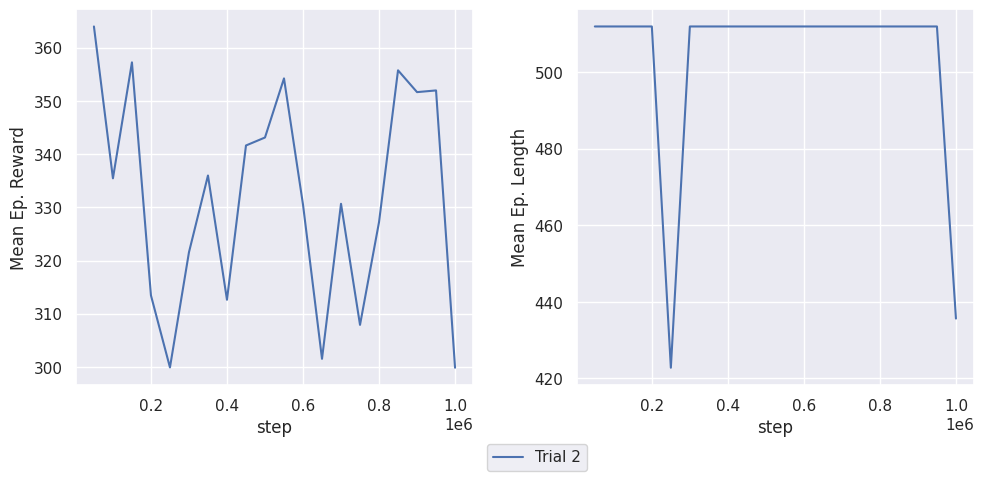

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

#set seaborn plotting aesthetics as default
sns.set_theme()

# Create subplots with legend=False
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df2 = df[(df['tag']=='eval/mean_reward') & (df['labels']=='Trial 2')]
df3 = df[(df['tag']=='eval/mean_ep_length') & (df['labels']=='Trial 2')]


sns.lineplot(data=df2, x='step', y='value', hue='labels', ax=axes[0], legend=False, )
sns.lineplot(data=df3, x='step', y='value', hue='labels', ax=axes[1])

axes[0].set_ylabel('Mean Ep. Reward')
axes[1].set_ylabel('Mean Ep. Length')

# # change the fontsize
# axes[0].tick_params(axis='x', labelsize=20)
# axes[0].tick_params(axis='y', labelsize=20)

# Create a legend for the first subplot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, ncol=len(labels), loc='lower center', bbox_to_anchor=(-0.1, -0.25)) #title='Legend'

# fig.suptitle(' Evaluation ', fontsize=15)

plt.tight_layout()
plt.show()

pdf_path = log_dir + '2024-11-14_13-42-07' + '/imgs/'
os.makedirs(pdf_path, exist_ok=True)

fig.savefig(pdf_path + "evaluation.pdf", bbox_inches='tight', dpi=300, transparent=False)

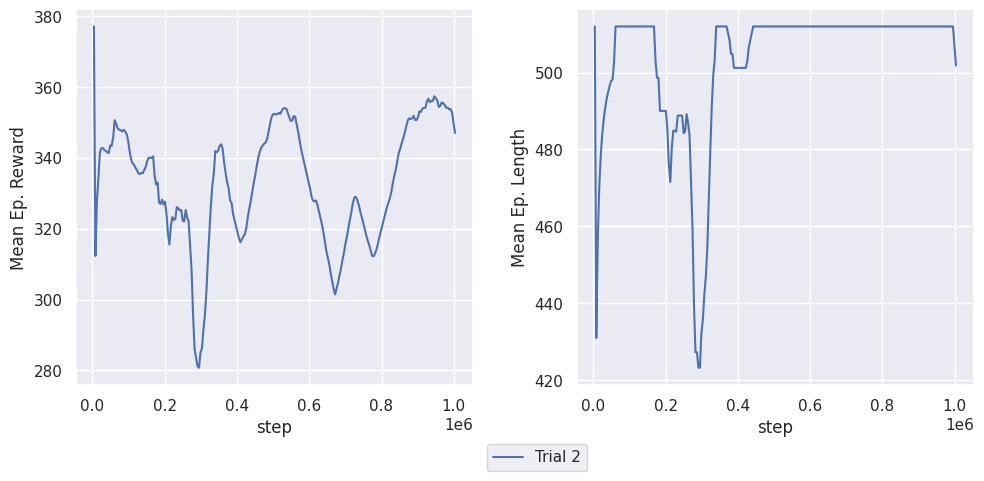

In [ ]:
# Create subplots with legend=False
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df2 = df[(df['tag']=='rollout/ep_rew_mean') & (df['labels']=='Trial 2')]
df3 = df[(df['tag']=='rollout/ep_len_mean') & (df['labels']=='Trial 2')]


sns.lineplot(data=df2, x='step', y='value', hue='labels', ax=axes[0], legend=False, )
sns.lineplot(data=df3, x='step', y='value', hue='labels', ax=axes[1])

axes[0].set_ylabel('Mean Ep. Reward')
axes[1].set_ylabel('Mean Ep. Length')

# Create a legend for the first subplot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, ncol=len(labels), loc='lower center', bbox_to_anchor=(-0.1, -.25)) # title='Legend'

# fig.suptitle(' Rollout ', fontsize=15)

plt.tight_layout()
plt.show()

fig.savefig(pdf_path + "rollout.pdf", bbox_inches='tight', dpi=300, transparent=False)

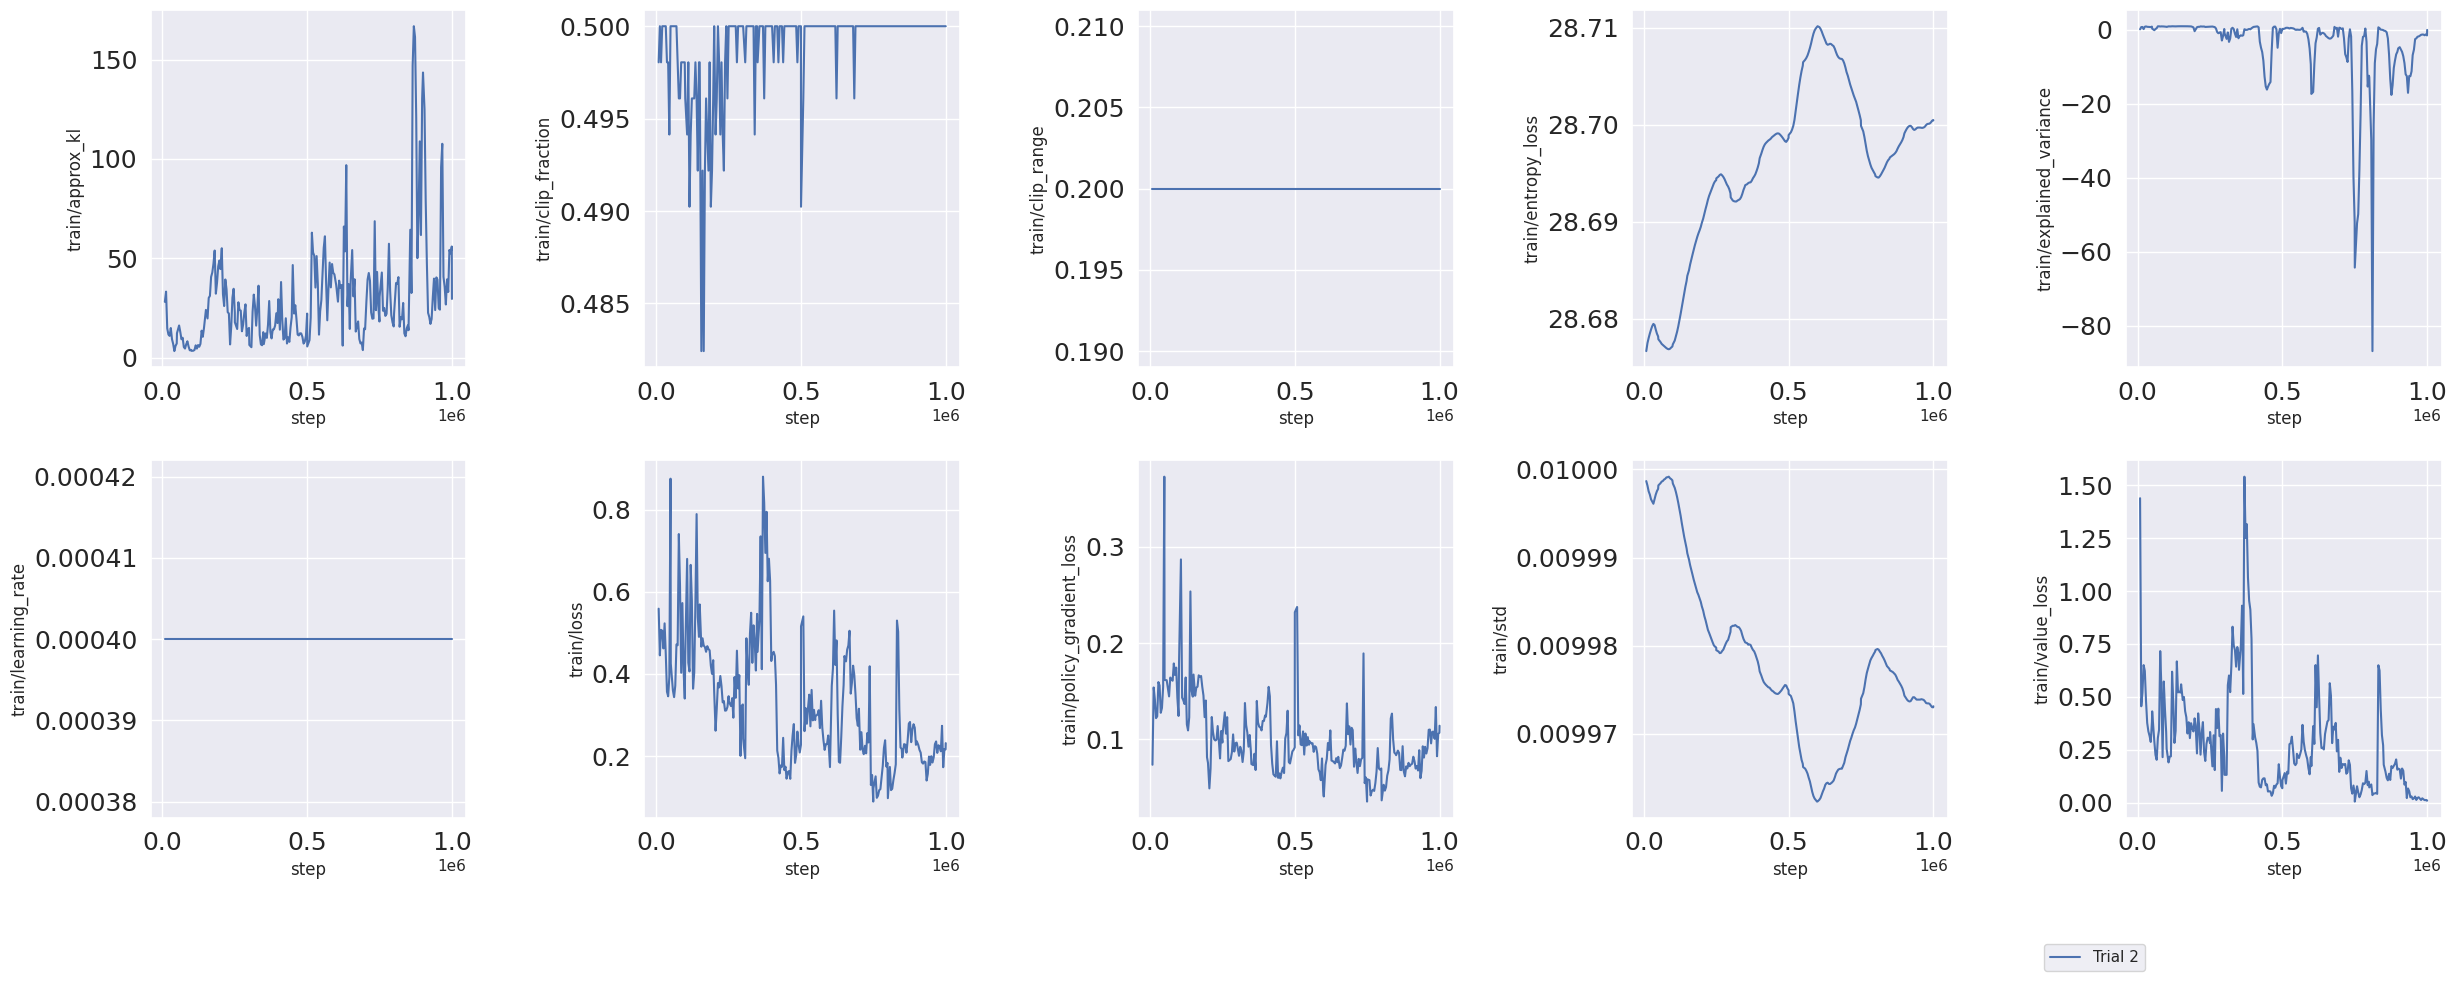

In [ ]:
df = df[(df['tag'].str.contains('train')) & (df['labels']=='Trial 2')]

# Get unique string values of the 'tag' column
unique_tags = list(df['tag'].unique())

# Create subplots with legend=False
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

id = 0
for i in range(2):
    for j in range(5):
        if id==9:
            sns.lineplot(data=df[df['tag'] == unique_tags[id]], x='step', y='value', hue='labels', ax=axes[i][j],)
        else:
            sns.lineplot(data=df[df['tag'] == unique_tags[id]], x='step', y='value', hue='labels', ax=axes[i][j], legend=False, )
        id+=1

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust horizontal and vertical space

id = 0
for i in range(2):
    for j in range(5):
        axes[i][j].set_ylabel(unique_tags[id])
        id+=1        

# Create a legend for the first subplot
handles, labels = axes[1][4].get_legend_handles_labels()
axes[1][4].legend(handles=handles, labels=labels, ncol=len(labels), loc='lower center', bbox_to_anchor=(-0.1, -.45)) #title='Legend'

# change the fontsize
for i in range(2):
    for j in range(5):
        axes[i][j].tick_params(axis='x', labelsize=18)
        axes[i][j].tick_params(axis='y', labelsize=18)

# fig.suptitle(' PPO Training ', fontsize=15)

# Setting the font size
sns.set_theme(font_scale=1.7)

plt.tight_layout()
plt.show()

fig.savefig(pdf_path + "net_training.pdf", bbox_inches='tight', dpi=300, transparent=False)

### Episode Plots (one test, cart_solv)

In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#set seaborn plotting aesthetics as default
sns.set_theme()

# Activating text rendering by LaTex
plt.rcParams.update({
    "text.usetex": False,
})

In [13]:
log_results = './log_results/1/cart_solv/ep_logs'
json_path = '/df_2024-12-10_17-34-53.json'
df = pd.read_json(log_results + json_path)
df.head()

,Steps,Done,reward,is_success,joints,joints_vel,cartesian,object_pose,timestep
0,1,"{'timesteps': False, 'goal_reached_pos': False}",-0.325875,0.0,"[-0.0004697659, 2.17699e-05, -0.1574431956, 1....","[-0.0063053854, 0.0012013696, 0.0597799122, -0...","[-0.2576182187, 0.1785451025, 1.1655819416, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.004006
1,2,"{'timesteps': False, 'goal_reached_pos': False}",-0.324351,0.0,"[0.0002234197, 8.1957e-06, -0.1565153599, 1.28...","[0.048692427600000004, -0.0018634123000000002,...","[-0.2578594983, 0.1780545115, 1.1633747816, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.130790
2,3,"{'timesteps': False, 'goal_reached_pos': False}",-0.323062,0.0,"[0.0019697186000000003, -7.33053e-05, -0.15600...","[0.0805407465, -0.0039405441, 0.0161987301, -0...","[-0.2581992745, 0.1776206344, 1.1615865231, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.143008
3,4,"{'timesteps': False, 'goal_reached_pos': False}",-0.322313,0.0,"[0.0041271853, -0.00015825450000000001, -0.155...","[0.0867086053, -0.0021187235, -0.0048958426, -...","[-0.2585878372, 0.1773951501, 1.1605788469, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.183661
4,5,"{'timesteps': False, 'goal_reached_pos': False}",-0.322238,0.0,"[0.0060645561, -0.0001373586, -0.1561950892, 1...","[0.0683249906, 0.0025936756, -0.0151492143, 0....","[-0.2588932812, 0.17741487920000001, 1.1605166...","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.202523


In [ ]:
df['cartesian'] = df['cartesian'].apply(np.array)   # Fix: convierte array(list()) a array(array())
df['deltatime'] = df['timestep'].diff().fillna(df['timestep'])
df['deltacart'] = df['cartesian'].diff().fillna(df['cartesian'])
df['eef_vel'] = df['deltacart'].apply(lambda x: x[:3])/df['deltatime']
df['eef_vmag'] = df['eef_vel'].apply(np.linalg.norm)
df['eef2tg'] = df['cartesian'].apply(lambda x: x[:3]) - df['object_pose'].apply(lambda x: x[:3])
df['eef2tg_norm'] = df['eef2tg'].apply(np.linalg.norm)

df[['timestep', 'deltatime', 'eef_vel','eef_vmag','eef2tg','eef2tg_norm']] 

,timestep,deltatime,eef_vel,eef_vmag,eef2tg,eef2tg_norm
0,0.004006,0.004006,"[-64.30189990689365, 44.56512962381207, 290.93...",301.266740,"[0.06709398550000001, 0.27780373550000004, 0.1...",0.325875
1,0.130790,0.126783,"[-0.0019030891180233963, -0.003869528934482131...",0.017935,"[0.06685270590000003, 0.2773131445, 0.15437478...",0.324351
2,0.143008,0.012219,"[-0.02780785345678658, -0.03550922876603677, -...",0.153146,"[0.0665129297, 0.2768792674, 0.1525865231000001]",0.323062
3,0.183661,0.040653,"[-0.009558090949311197, -0.0055465937596218436...",0.027139,"[0.06612436700000002, 0.2766537831, 0.15157884...",0.322313
4,0.202523,0.018862,"[-0.01619401834070437, 0.0010459966712250825, ...",0.016560,"[0.06581892300000003, 0.2766735122, 0.15151661...",0.322238
...,...,...,...,...,...,...
212,4.734219,0.013237,"[4.502530954302226e-06, -1.2940999204857762e-0...",0.000016,"[-0.0028835363999999974, 0.0003270448000000092...",0.014912
213,4.765905,0.031686,"[2.8245640253010176e-06, -5.172581493170821e-0...",0.000007,"[-0.002883446899999975, 0.0003268809000000067,...",0.014912
214,4.801218,0.035313,"[1.6877461294433522e-06, -4.222197113043899e-0...",0.000005,"[-0.0028833872999999843, 0.0003267318000000074...",0.014912
215,4.819129,0.017910,"[3.327704895937934e-06, -8.319262241394538e-06...",0.000010,"[-0.0028833276999999935, 0.0003265828000000026...",0.014912


Text(0.5, 0.98, 'Episode (un-normalized, un-cropped)')

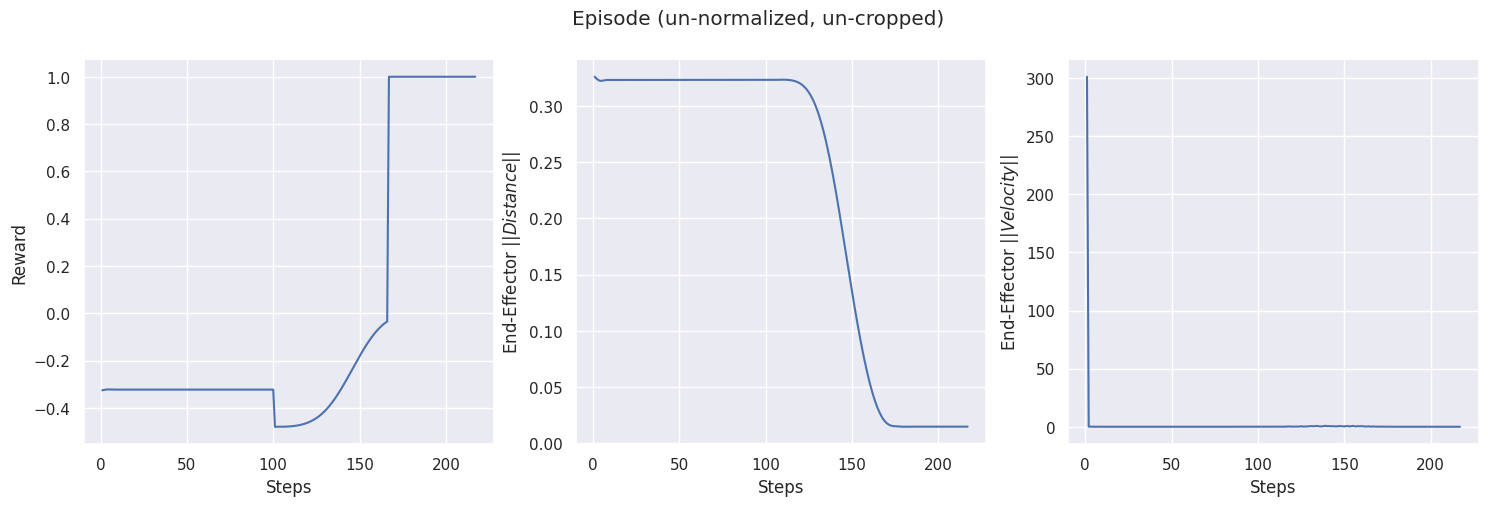

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot episode rewards
ax = df.plot(x='Steps', y='reward', ax=axes[0], legend=False)
ax.set_xlabel('Steps')
ax.set_ylabel('Reward')
# plt.savefig(FLAGS.eval_dir + "/ep_rew_{}.pdf".format(now.strftime("%Y-%m-%d_%H-%M-%S")))

ax = df.plot(x='Steps', y='eef2tg_norm', ax=axes[1], legend=False)
ax.set_ylabel(r'End-Effector $||Distance||$')

# Plot velocity magnitude of end-effector
ax = df.plot(x='Steps', y='eef_vmag', ax=axes[2], legend=False)
ax.set_xlabel('Steps')
ax.set_ylabel(r'End-Effector $||Velocity||$')
# plt.savefig(FLAGS.eval_dir + "/ep_eef_vmag_{}.pdf".format(now.strftime("%Y-%m-%d_%H-%M-%S")))


plt.suptitle('Episode (un-normalized, un-cropped)')

Text(0.5, 0.98, 'End-effector (un-normalized, cropped)')

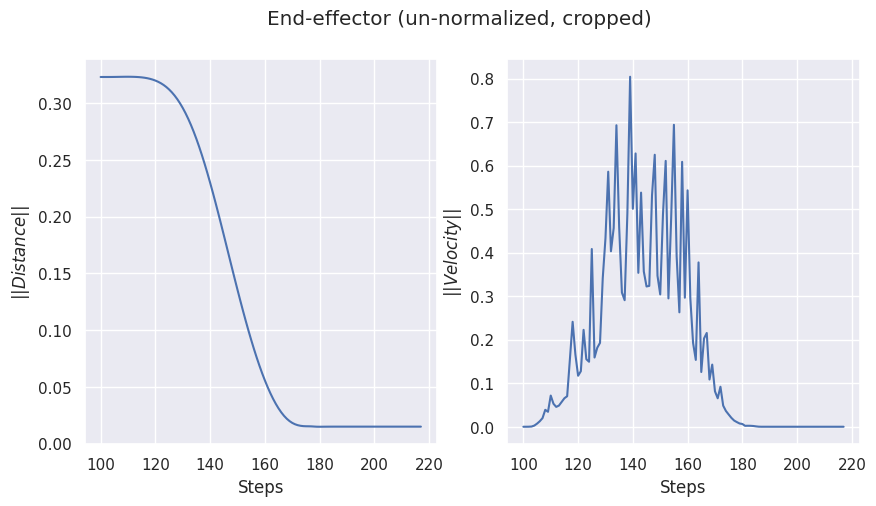

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df1 = df[['Steps', 'eef_vmag']].iloc[99:]
df2 = df[['Steps', 'eef2tg_norm']].iloc[99:]

# plt.ylabel('eef_vmag')
ax = df2.plot(x='Steps', y='eef2tg_norm', ax=axes[0], legend=False)
ax.set_ylabel(r'$||Distance||$')

ax = df1.plot(x='Steps', y='eef_vmag', ax=axes[1], legend=False)
ax.set_ylabel(r'$||Velocity||$')

# plt.ylabel('|eef2tg|')
# plt.xlabel('Steps')
# ax.set_ylabel('Velocity (\N{DEGREE SIGN}/sec)', fontsize=16)

plt.suptitle('End-effector (un-normalized, cropped)')

In [ ]:
plt.savefig(log_results + "/ep_eef_vmag_{}.pdf".format(json_path[4:-5]))

<Figure size 640x480 with 0 Axes>

In [30]:
# Normalization
df1 = df[['Steps','eef_vmag','eef2tg_norm']].iloc[99:]

# #Normalize Using Mean Normalization.
# normalized_df=(df1-df1.mean())/df1.std()

# Normalize using Min/Max Normalization.
normalized_df=(df1-df1.min())/(df1.max()-df1.min())
normalized_df


,Steps,eef_vmag,eef2tg_norm
99,0.000000,0.000020,0.999313
100,0.008547,0.000008,0.999313
101,0.017094,0.000134,0.999308
102,0.025641,0.000604,0.999317
103,0.034188,0.003346,0.999368
...,...,...,...
212,0.965812,0.000020,0.000314
213,0.974359,0.000008,0.000314
214,0.982906,0.000006,0.000313
215,0.991453,0.000012,0.000313


Text(0.5, 1.0, 'End-effector (normalized)')

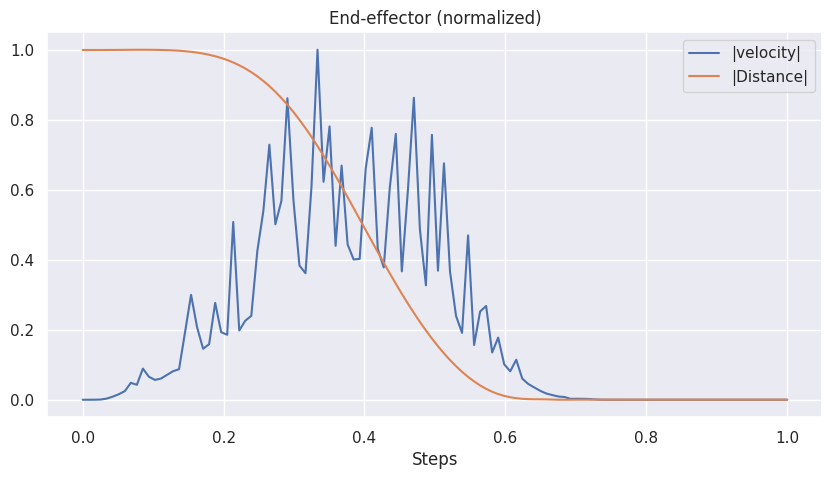

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax = normalized_df.plot(x='Steps', y=['eef_vmag','eef2tg_norm'], ax=axes)

plt.legend(['|velocity|','|Distance|'])
plt.title('End-effector (normalized, cropped)')

### Episode Plots (all test, cart_solv)

In [35]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

#set seaborn plotting aesthetics as default
sns.set_theme()

# Activating text rendering by LaTex
plt.rcParams.update({
    "text.usetex": False,
})

In [ ]:
log_results = './log_results/1/cart_solv/ep_logs'
json_list = []
for name in sorted(glob.glob(log_results + '/*.json')):
    json_list.append(name)

['./log_results/1/cart_solv/ep_logs/df_2024-12-10_17-34-53.json', './log_results/1/cart_solv/ep_logs/df_2024-12-10_17-35-10.json', './log_results/1/cart_solv/ep_logs/df_2024-12-10_17-35-28.json', './log_results/1/cart_solv/ep_logs/df_2024-12-10_17-35-46.json', './log_results/1/cart_solv/ep_logs/df_2024-12-10_17-36-10.json']


In [48]:
temp_df = pd.DataFrame()
for num, json_path in enumerate(json_list):
    df = pd.read_json(json_path)
    df['Test'] = num
    temp_df = pd.concat([temp_df, df], axis=0)

temp_df[temp_df['Test'] == 0].head()

,Steps,Done,reward,is_success,joints,joints_vel,cartesian,object_pose,timestep,Test
0,1,"{'timesteps': False, 'goal_reached_pos': False}",-0.325875,0.0,"[-0.0004697659, 2.17699e-05, -0.1574431956, 1....","[-0.0063053854, 0.0012013696, 0.0597799122, -0...","[-0.2576182187, 0.1785451025, 1.1655819416, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.004006,0
1,2,"{'timesteps': False, 'goal_reached_pos': False}",-0.324351,0.0,"[0.0002234197, 8.1957e-06, -0.1565153599, 1.28...","[0.048692427600000004, -0.0018634123000000002,...","[-0.2578594983, 0.1780545115, 1.1633747816, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.130790,0
2,3,"{'timesteps': False, 'goal_reached_pos': False}",-0.323062,0.0,"[0.0019697186000000003, -7.33053e-05, -0.15600...","[0.0805407465, -0.0039405441, 0.0161987301, -0...","[-0.2581992745, 0.1776206344, 1.1615865231, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.143008,0
3,4,"{'timesteps': False, 'goal_reached_pos': False}",-0.322313,0.0,"[0.0041271853, -0.00015825450000000001, -0.155...","[0.0867086053, -0.0021187235, -0.0048958426, -...","[-0.2585878372, 0.1773951501, 1.1605788469, 2....","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.183661,0
4,5,"{'timesteps': False, 'goal_reached_pos': False}",-0.322238,0.0,"[0.0060645561, -0.0001373586, -0.1561950892, 1...","[0.0683249906, 0.0025936756, -0.0151492143, 0....","[-0.2588932812, 0.17741487920000001, 1.1605166...","[-0.3247122042, -0.09925863300000001, 1.009, 0...",0.202523,0


In [50]:
df_all = pd.DataFrame()
for test in temp_df['Test'].unique():
    df = temp_df[temp_df['Test'] == test].copy()
    df['cartesian'] = df['cartesian'].apply(np.array)   # Fix: convierte array(list()) a array(array())
    df['deltatime'] = df['timestep'].diff().fillna(df['timestep'])
    df['deltacart'] = df['cartesian'].diff().fillna(df['cartesian'])
    df['eef_vel'] = df['deltacart'].apply(lambda x: x[:3])/df['deltatime']
    df['eef_vmag'] = df['eef_vel'].apply(np.linalg.norm)
    df['eef2tg'] = df['cartesian'].apply(lambda x: x[:3]) - df['object_pose'].apply(lambda x: x[:3])
    df['eef2tg_norm'] = df['eef2tg'].apply(np.linalg.norm)

    df_all = pd.concat([df_all, df], axis=0)

df_all[['timestep', 'deltatime', 'eef_vel','eef_vmag','eef2tg','eef2tg_norm','Test']] 

,timestep,deltatime,eef_vel,eef_vmag,eef2tg,eef2tg_norm,Test
0,0.004006,0.004006,"[-64.30189990689365, 44.56512962381207, 290.93...",301.266740,"[0.06709398550000001, 0.27780373550000004, 0.1...",0.325875,0
1,0.130790,0.126783,"[-0.0019030891180233963, -0.003869528934482131...",0.017935,"[0.06685270590000003, 0.2773131445, 0.15437478...",0.324351,0
2,0.143008,0.012219,"[-0.02780785345678658, -0.03550922876603677, -...",0.153146,"[0.0665129297, 0.2768792674, 0.1525865231000001]",0.323062,0
3,0.183661,0.040653,"[-0.009558090949311197, -0.0055465937596218436...",0.027139,"[0.06612436700000002, 0.2766537831, 0.15157884...",0.322313,0
4,0.202523,0.018862,"[-0.01619401834070437, 0.0010459966712250825, ...",0.016560,"[0.06581892300000003, 0.2766735122, 0.15151661...",0.322238,0
...,...,...,...,...,...,...,...
213,4.803528,0.029504,"[3.030091380404586e-06, -7.321026152760177e-06...",0.000009,"[-0.002936531699999967, 0.0006769335999999987,...",0.020175,4
214,4.838382,0.034853,"[2.5650252171816893e-06, -5.56042379531324e-06...",0.000006,"[-0.0029364423000000084, 0.0006767398000000063...",0.020175,4
215,4.851041,0.012659,"[7.069894926217236e-06, -1.353154190602516e-05...",0.000015,"[-0.002936352799999986, 0.0006765685000000021,...",0.020175,4
216,4.873350,0.022309,"[5.343119512896429e-06, -6.678899392364675e-06...",0.000009,"[-0.0029362336000000044, 0.0006764194999999973...",0.020175,4


Text(0.5, 0.98, 'Episode (un-normalized, un-cropped)')

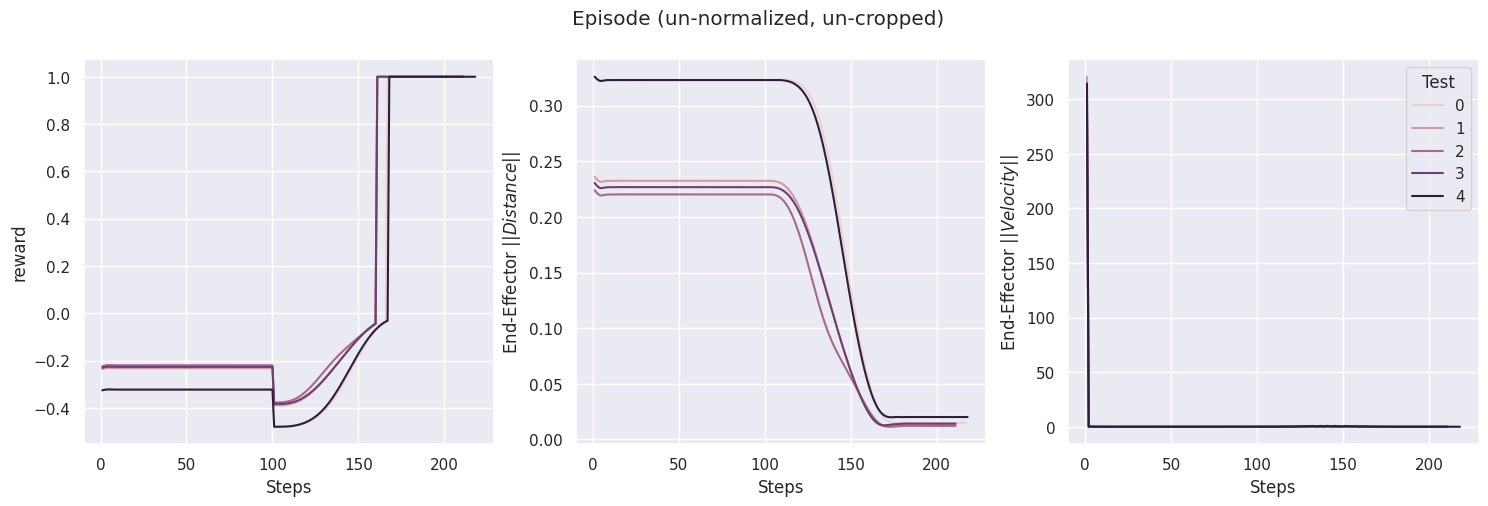

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

ax = sns.lineplot(data=df_all, x='Steps', y='reward', hue='Test', ax=axes[0], legend=False)

ax = sns.lineplot(data=df_all, x='Steps', y='eef2tg_norm', hue='Test', ax=axes[1], legend=False)
ax.set_ylabel(r'End-Effector $||Distance||$')

ax = sns.lineplot(data=df_all, x='Steps', y='eef_vmag', hue='Test', ax=axes[2])
ax.set_ylabel(r'End-Effector $||Velocity||$')

plt.suptitle('Episode (un-normalized, un-cropped)')

Text(0.5, 0.98, 'End-effector (un-normalized, cropped)')

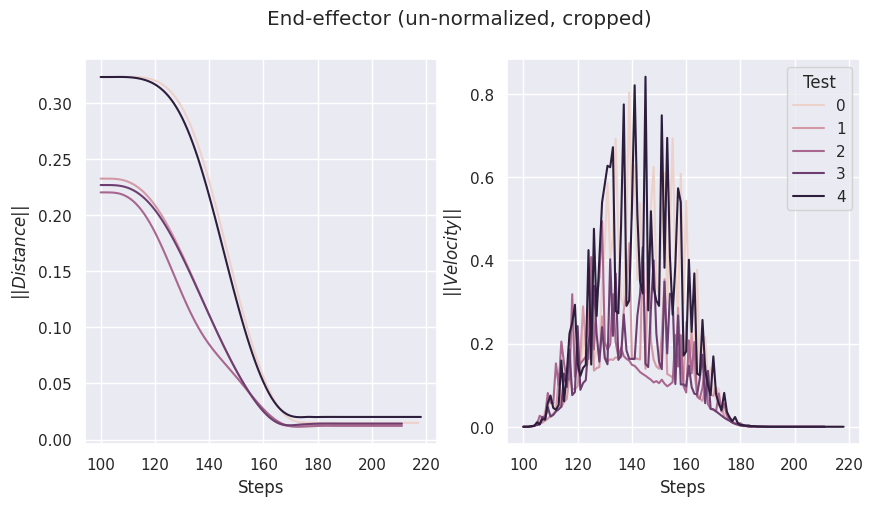

In [ ]:
def filtrar_por_Steps(grupo):
  """Filtra un grupo por timestep >= 100.

  Args:
    grupo: Un DataFrame que representa un grupo.

  Returns:
    Un DataFrame filtrado.
  """
  return grupo[grupo['Steps'] >= 100]

# Agrupar por 'Test' y aplicar la función de filtrado
df_filtrado = df_all.groupby('Test').apply(filtrar_por_Steps)
# Resetear el índice si es necesario
df_filtrado = df_filtrado.reset_index(drop=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax = sns.lineplot(data=df_filtrado, x='Steps', y='eef2tg_norm', hue='Test', ax=axes[0], legend=False)
ax.set_ylabel(r'$||Distance||$')

ax = sns.lineplot(data=df_filtrado, x='Steps', y='eef_vmag', hue='Test', ax=axes[1])
ax.set_ylabel(r'$||Velocity||$')

plt.suptitle('End-effector (un-normalized, cropped)')

In [80]:
# Columns to normalize (excluding 'Test')
cols_to_normalize = ['Steps', 'eef_vmag', 'eef2tg_norm']

# Normalize the specified columns within each group
normalized_df = df1.groupby('Test')[cols_to_normalize].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Concatenate the normalized columns with the original 'Test' column
normalized_df = pd.concat([normalized_df, df1['Test']], axis=1)

normalized_df

,Steps,eef_vmag,eef2tg_norm,Test
0,0.000000,0.000020,0.999313,0
1,0.008547,0.000008,0.999313,0
2,0.017094,0.000134,0.999308,0
3,0.025641,0.000604,0.999317,0
4,0.034188,0.003346,0.999368,0
...,...,...,...,...
568,0.966102,0.000009,0.000721,4
569,0.974576,0.000006,0.000721,4
570,0.983051,0.000016,0.000721,4
571,0.991525,0.000009,0.000721,4


Text(0.5, 0.98, 'End-effector (normalized, cropped)')

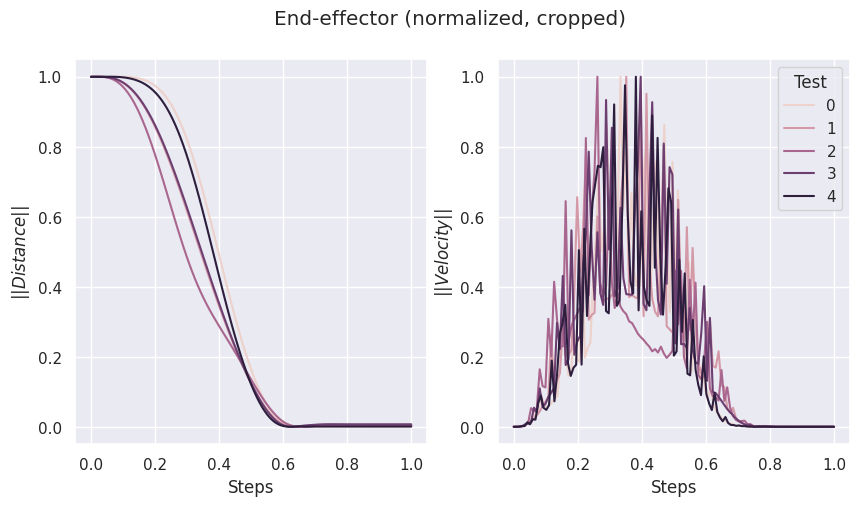

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# ax = normalized_df.plot(x='Steps', y=['eef_vmag','eef2tg_norm'], ax=axes)

ax = sns.lineplot(data=normalized_df, x='Steps', y='eef2tg_norm', hue='Test', ax=axes[0], legend=False)
ax.set_ylabel(r'$||Distance||$')

ax = sns.lineplot(data=normalized_df, x='Steps', y='eef_vmag', hue='Test', ax=axes[1])
ax.set_ylabel(r'$||Velocity||$')

# plt.legend(['|velocity|','|Distance|'])
plt.suptitle('End-effector (normalized, cropped)')

### Episode Plots (one test, RL controller)

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#set seaborn plotting aesthetics as default
sns.set_theme()

# Activating text rendering by LaTex
plt.rcParams.update({
    "text.usetex": False,
})

In [94]:
log_results = './log_results/1/fix_step_rw_v2/test17/2024-12-05_09-32-52/ep_logs/'
json_path = '/df_2024-12-11_01-04-17.json'
df = pd.read_json(log_results + json_path)
df.head()

,Steps,Done,reward,is_success,joints,joints_vel,cartesian,object_pose,timestep
0,1,"{'timesteps': False, 'goal_reached_pos': False}",-0.346901,False,"[-0.0004697659, 2.17699e-05, -0.1574431956, 1....","[-0.0063053854, 0.0012013696, 0.0597799122, -0...","[-0.2576182187, 0.1785451025, 1.1655819416, 2....","[-0.3973525948, -0.0976732842, 1.009, 0.0, 0.0...",0.003806
1,2,"{'timesteps': False, 'goal_reached_pos': False}",-0.345421,False,"[0.0002234197, 8.1957e-06, -0.1565153599, 1.28...","[0.048692427600000004, -0.0018634123000000002,...","[-0.2578594983, 0.1780545115, 1.1633747816, 2....","[-0.3973525948, -0.0976732842, 1.009, 0.0, 0.0...",0.167851
2,3,"{'timesteps': False, 'goal_reached_pos': False}",-0.344141,False,"[0.0019697186000000003, -7.33053e-05, -0.15600...","[0.0805407465, -0.0039405441, 0.0161987301, -0...","[-0.2581992745, 0.1776206344, 1.1615865231, 2....","[-0.3973525948, -0.0976732842, 1.009, 0.0, 0.0...",0.183188
3,4,"{'timesteps': False, 'goal_reached_pos': False}",-0.343358,False,"[0.0041271853, -0.00015825450000000001, -0.155...","[0.0867086053, -0.0021187235, -0.0048958426, -...","[-0.2585878372, 0.1773951501, 1.1605788469, 2....","[-0.3973525948, -0.0976732842, 1.009, 0.0, 0.0...",0.195709
4,5,"{'timesteps': False, 'goal_reached_pos': False}",-0.343223,False,"[0.0060645561, -0.0001373586, -0.1561950892, 1...","[0.0683249906, 0.0025936756, -0.0151492143, 0....","[-0.2588932812, 0.17741487920000001, 1.1605166...","[-0.3973525948, -0.0976732842, 1.009, 0.0, 0.0...",0.207560


In [95]:
df['cartesian'] = df['cartesian'].apply(np.array)   # Fix: convierte array(list()) a array(array())
df['deltatime'] = df['timestep'].diff().fillna(df['timestep'])
df['deltacart'] = df['cartesian'].diff().fillna(df['cartesian'])
df['eef_vel'] = df['deltacart'].apply(lambda x: x[:3])/df['deltatime']
df['eef_vmag'] = df['eef_vel'].apply(np.linalg.norm)
df['eef2tg'] = df['cartesian'].apply(lambda x: x[:3]) - df['object_pose'].apply(lambda x: x[:3])
df['eef2tg_norm'] = df['eef2tg'].apply(np.linalg.norm)

df[['timestep', 'deltatime', 'eef_vel','eef_vmag','eef2tg','eef2tg_norm']] 

,timestep,deltatime,eef_vel,eef_vmag,eef2tg,eef2tg_norm
0,0.003806,0.003806,"[-67.68536233095686, 46.91007497883274, 306.23...",317.118910,"[0.1397343761, 0.2762183867, 0.15658194160000005]",0.346901
1,0.167851,0.164045,"[-0.0014708105025837451, -0.002990581861347198...",0.013861,"[0.13949309650000002, 0.2757277957, 0.15437478...",0.345421
2,0.183188,0.015336,"[-0.022155066845405635, -0.02829090487559179, ...",0.122014,"[0.1391533203, 0.2752939186, 0.1525865231000001]",0.344141
3,0.195709,0.012521,"[-0.031033400999189668, -0.018008791633684153,...",0.088116,"[0.1387647576, 0.2750684343, 0.15157884690000012]",0.343358
4,0.207560,0.011851,"[-0.025773532746061104, 0.001664752311063393, ...",0.026356,"[0.13845931360000002, 0.27508816340000003, 0.1...",0.343223
...,...,...,...,...,...,...
265,3.571261,0.013977,"[0.006548195542414816, -0.008383549659603492, ...",0.011037,"[-0.01956532529999999, -0.002841783400000006, ...",0.019938
266,3.585443,0.014182,"[0.006354862006537981, -0.007994012529180595, ...",0.010589,"[-0.019475203100000005, -0.0029551514000000084...",0.019861
267,3.599238,0.013795,"[0.006483099938459735, -0.008045543782865839, ...",0.010707,"[-0.019385766299999996, -0.0030661426999999963...",0.019786
268,3.613057,0.013819,"[0.0064850771352467015, -0.007981262663238564,...",0.010657,"[-0.019296150700000014, -0.0031764337000000087...",0.019710


Text(0.5, 0.98, 'Episode (un-normalized, un-cropped)')

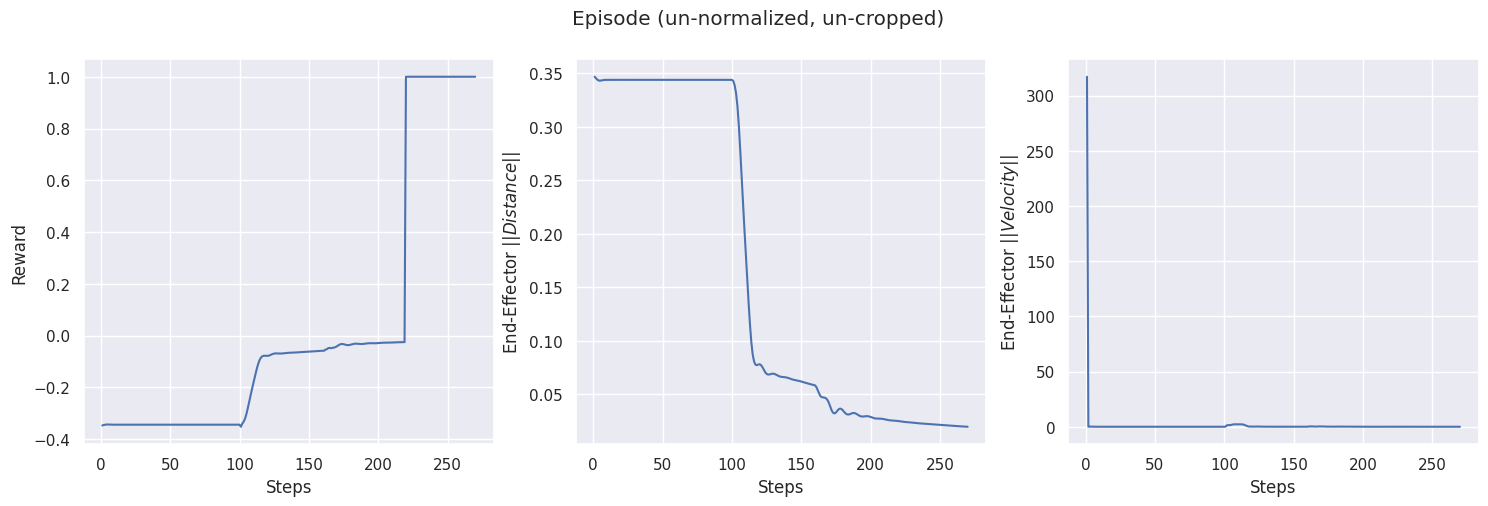

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot episode rewards
ax = df.plot(x='Steps', y='reward', ax=axes[0], legend=False)
ax.set_xlabel('Steps')
ax.set_ylabel('Reward')
# plt.savefig(FLAGS.eval_dir + "/ep_rew_{}.pdf".format(now.strftime("%Y-%m-%d_%H-%M-%S")))

ax = df.plot(x='Steps', y='eef2tg_norm', ax=axes[1], legend=False)
ax.set_ylabel(r'End-Effector $||Distance||$')

# Plot velocity magnitude of end-effector
ax = df.plot(x='Steps', y='eef_vmag', ax=axes[2], legend=False)
ax.set_xlabel('Steps')
ax.set_ylabel(r'End-Effector $||Velocity||$')
# plt.savefig(FLAGS.eval_dir + "/ep_eef_vmag_{}.pdf".format(now.strftime("%Y-%m-%d_%H-%M-%S")))


plt.suptitle('Episode (un-normalized, un-cropped)')

Text(0.5, 0.98, 'End-effector (un-normalized, cropped)')

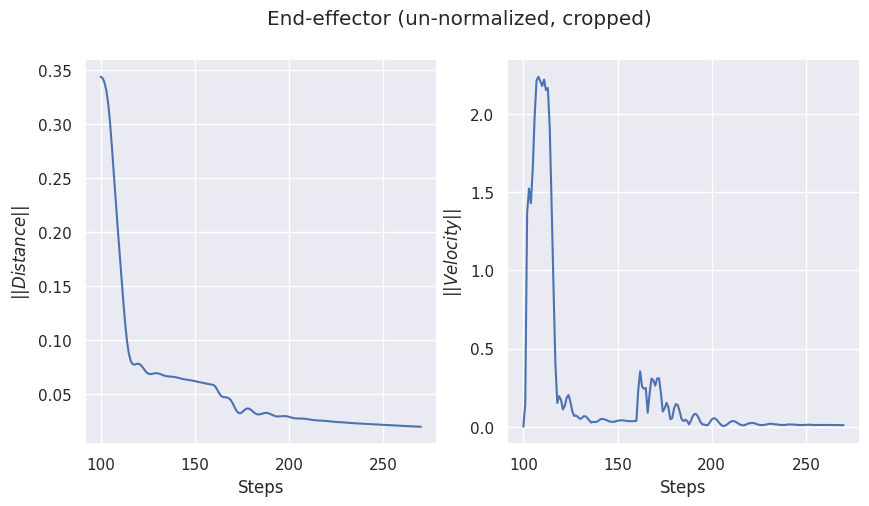

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df1 = df[['Steps', 'eef_vmag']].iloc[99:]
df2 = df[['Steps', 'eef2tg_norm']].iloc[99:]

# plt.ylabel('eef_vmag')
ax = df2.plot(x='Steps', y='eef2tg_norm', ax=axes[0], legend=False)
ax.set_ylabel(r'$||Distance||$')

ax = df1.plot(x='Steps', y='eef_vmag', ax=axes[1], legend=False)
ax.set_ylabel(r'$||Velocity||$')

# plt.ylabel('|eef2tg|')
# plt.xlabel('Steps')
# ax.set_ylabel('Velocity (\N{DEGREE SIGN}/sec)', fontsize=16)

plt.suptitle('End-effector (un-normalized, cropped)')

In [98]:
# Normalization
df1 = df[['Steps','eef_vmag','eef2tg_norm']].iloc[99:]

# #Normalize Using Mean Normalization.
# normalized_df=(df1-df1.mean())/df1.std()

# Normalize using Min/Max Normalization.
normalized_df=(df1-df1.min())/(df1.max()-df1.min())
normalized_df

,Steps,eef_vmag,eef2tg_norm
99,0.000000,0.000000,1.000000
100,0.005882,0.065693,0.996484
101,0.011765,0.610269,0.984357
102,0.017647,0.680698,0.961443
103,0.023529,0.638566,0.924067
...,...,...,...
265,0.976471,0.004924,0.000934
266,0.982353,0.004724,0.000697
267,0.988235,0.004777,0.000463
268,0.994118,0.004754,0.000232


Text(0.5, 1.0, 'End-effector (normalized, cropped)')

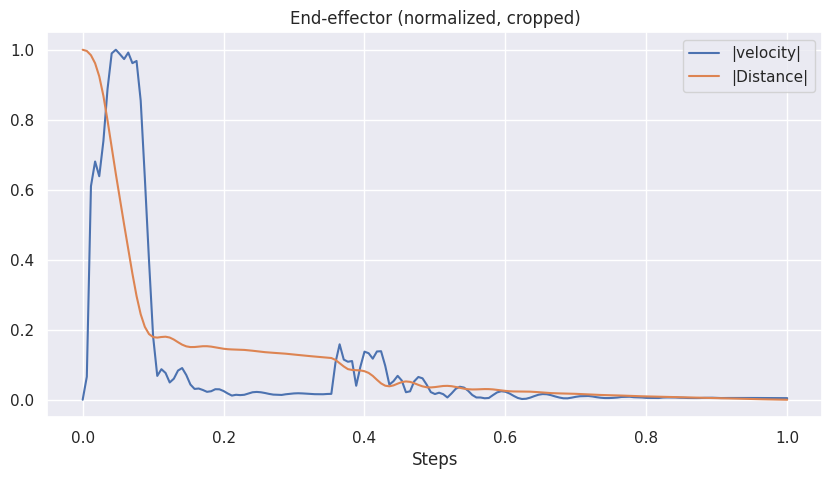

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax = normalized_df.plot(x='Steps', y=['eef_vmag','eef2tg_norm'], ax=axes)

plt.legend(['|velocity|','|Distance|'])
plt.title('End-effector (normalized, cropped)')